Task Details You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

<b>ID</b>=Customer's unique identifier<br>
<b>Year_Birth</b>=Customer's birth year<br>
<b>Education</b>=Customer's education level<br>
<b>Marital_Status</b>=Customer's marital status<br>
<b>Income</b>=Customer's yearly household income<br>
<b>Kidhome</b>=Number of children in customer's household<br>
<b>Teenhome</b>=Number of teenagers in customer's household<br>
<b>Dt_Customer</b>=Date of customer's enrollment with the company<br>
<b>Recency</b>=Number of days since customer's last purchase<br>
<b>MntWines</b>=Amount spent on wine in the last 2 years<br>
<b>MntFruits</b>=Amount spent on fruits in the last 2 years<br>
<b>MntMeatProducts</b>=Amount spent on meat in the last 2 years<br>
<b>MntFishProducts</b>=Amount spent on fish in the last 2 years<br>
<b>MntSweetProducts</b>=Amount spent on sweets in the last 2 years<br>
<b>MntGoldProds</b>=Amount spent on gold in the last 2 years<br>
<b>NumDealsPurchases</b>=Number of purchases made with a discount<br>
<b>NumWebPurchases</b>=Number of purchases made through the company's web site<br>
<b>NumStorePurchases</b>=Number of purchases made directly in stores<br>
<b>NumWebVisitsMonth</b>=Number of visits to company's web site in the last month<br>
<b>AcceptedCmp3</b>=1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
<b>AcceptedCmp4</b>=1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
<b>AcceptedCmp5</b>=1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
<b>AcceptedCmp1</b>=1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
<b>AcceptedCmp2</b>=1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
<b>Response</b>=1 if customer accepted the offer in the last campaign, 0 otherwise<br>
<b>Complain</b>=1 if customer complained in the last 2 years, 0 otherwise<br>
<b>Country</b>=Customer's location

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
data= pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [28]:
data.shape

(2240, 36)

<strong>checking for null values</strong>

In [4]:
print(data.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


<h2>Cleaning the Data</h2>
1)colomn ' Income ' > 'Income'<br>
2)The way to deal with the null values will be to enter the income's mean in to those null values<br>
3)another problem we dealing with is to reformat the income fileds and make them an INT<br>



In [5]:
data=data.rename(columns={' Income ':'Income'})
income_mean=[]
new_col=[]
for temp in data.Income.copy().dropna():
    temp=int((temp.split('$')[1].split(',')[0])+((temp.split('$')[1].split(',')[1].split('.')[0])))
    income_mean.append(temp)
data['Income']=data['Income'].fillna(int(np.mean(income_mean)))
for i in data.Income.copy():
    if i==int(np.mean(income_mean)):
        new_col.append(i)
        pass
    else:
        i=int((i.split('$')[1].split(',')[0])+((i.split('$')[1].split(',')[1].split('.')[0])))
        new_col.append(i)
data=pd.concat([data.drop(columns=['Income']),pd.DataFrame(new_col,columns=['Income'])],axis=1)  


ordering back the columns 

In [6]:
income=data.pop('Income')
data.insert(1,'Income',income)

4)Some of the years are not valid e.g 1900 so we will change them to the most reasonable early year 1940<br>

In [7]:
for year in data.Year_Birth.copy():
    if year<1940:
        data.Year_Birth=data.Year_Birth.replace({year:1940})


In the Marital_Status columns we got some confusing values e.g "YOLO", "ALONE", "ABSURD" so we will replace those values to "Single" and "Together" change into "In a relationship"

In [8]:
data['Marital_Status'].replace({'YOLO':'Single','Absurd':'Single','Alone':'Single','Together':'In a relationship'},inplace=True)
data.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'In a relationship', 'Widow'],
      dtype=object)

5)Breaking the "Dt_customer" into "Dt_year" , "Dt_month" and "Dt_day"

In [9]:
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
data['Dt_year']=data.Dt_Customer.dt.year
data['Dt_month']=data.Dt_Customer.dt.month
data['Dt_day']=data.Dt_Customer.dt.day

6)Replacing "Year_Birth" into "Age"<br>

In [10]:
date=date.today()
data.Year_Birth=(int(date.year)-data.Year_Birth)
data=data.rename(columns={'Year_Birth':'age'})


7)Before the Visualization part I would like to build some new columns that will help us analyze the data better e.g <br><br>
1)"Have_Kids", 1 if has 0 if not<br>
2)"Total_Purchase"<br>
3)"Accepted_All_Campaigns"<br>
4)"Declained_All_Campaigns"

In [11]:
data['Have_Kids']= np.where(data.Kidhome+data.Teenhome>0,'1','0')
data['Total_Purchase']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Accepted_All_Campaigns']=np.where((data.AcceptedCmp1+data.AcceptedCmp1+data.AcceptedCmp1+
                                         data.AcceptedCmp1+data.AcceptedCmp1+data.Response)==6,'1','0')
data['Declained_All_Campaigns']=np.where((data.AcceptedCmp1+data.AcceptedCmp1+data.AcceptedCmp1+
                                         data.AcceptedCmp1+data.AcceptedCmp1+data.Response)==0,'1','0')

data.head()

,ID,Income,age,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,Dt_year,Dt_month,Dt_day,Have_Kids,Total_Purchase,Accepted_All_Campaigns,Declained_All_Campaigns
0,1826,84835,52,Graduation,Divorced,0,0,2014-06-16,0,189,...,1,0,SP,2014,6,16,0,1190,0,0
1,1,57091,61,Graduation,Single,0,0,2014-06-15,0,464,...,1,0,CA,2014,6,15,0,577,0,0
2,10476,67267,64,Graduation,Married,0,1,2014-05-13,0,134,...,0,0,US,2014,5,13,1,251,0,1
3,1386,32474,55,Graduation,In a relationship,1,1,2014-05-11,0,10,...,0,0,AUS,2014,5,11,1,11,0,1
4,5371,21474,33,Graduation,Single,1,0,2014-04-08,0,6,...,1,0,SP,2014,4,8,1,91,0,0


<h2>Data Visualization</h2>

<strong>Correlation heat map</strong><br>
Checking the correlation between the different columns

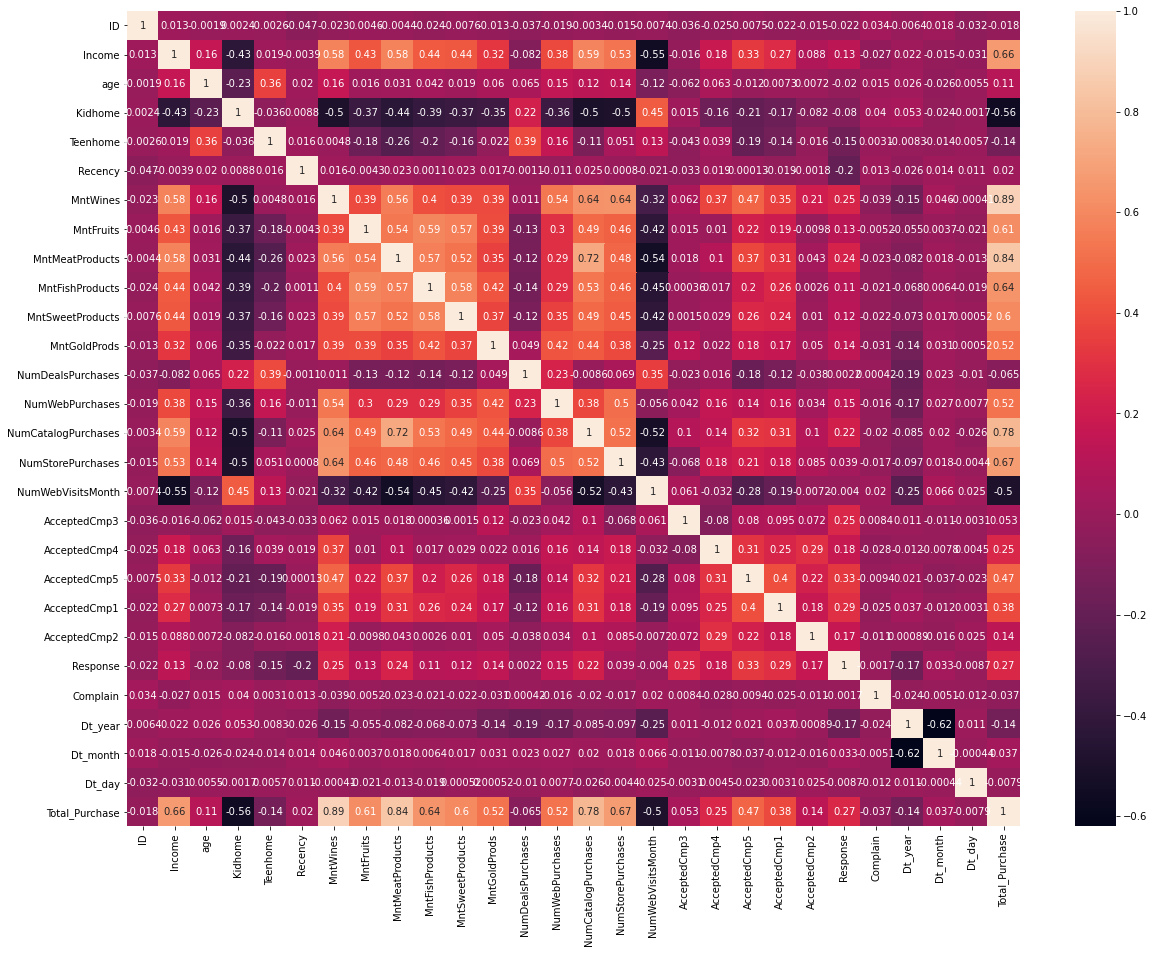

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

To explore the connections of the NumStorePurchases column we used correlation heat map and we can see the folloing:<br>
1)We can see that pepole love to buy their wine at the store (0.64 corr)<br>
2)Pepole with kids at home prefer web shoping (-0.5 corr)<br>


<strong>Age buyers distribiution</strong>

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

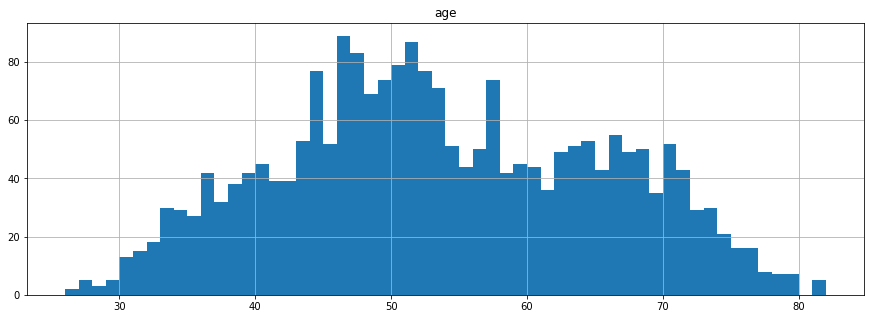

In [13]:
data.hist('age',figsize=(15,5),bins=len(data.age.unique()))

<strong>Marital_Status distribution</strong>

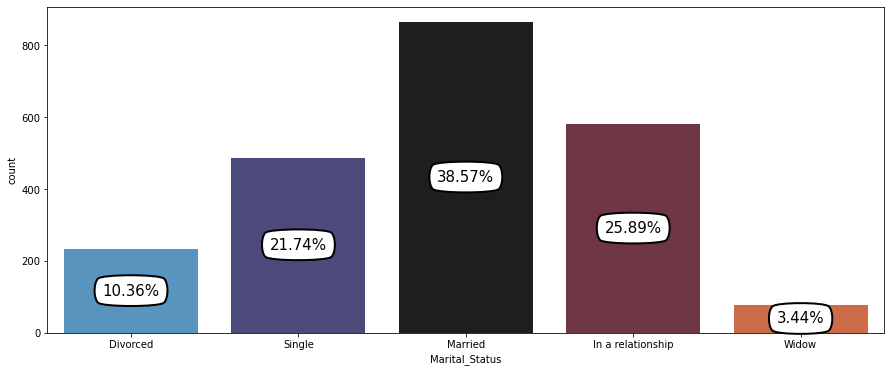

In [14]:
plt.figure(figsize = (15,6))
plots= sns.countplot(x='Marital_Status',data=data,palette='icefire')
total=data.Marital_Status.count()
for bar in plots.patches:
    _ =plots.annotate(format((bar.get_height()/total)*100, '.2f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')

<h3>Revenue by products</h3>


In [15]:
revenue = pd.DataFrame(data.iloc[:,9:15].sum(),columns=['rev_generated']).sort_values(by=["rev_generated"],ascending=False).reset_index()
revenue

,index,rev_generated
0,MntWines,680816
1,MntMeatProducts,373968
2,MntGoldProds,98609
3,MntFishProducts,84057
4,MntSweetProducts,60621
5,MntFruits,58917


Our main income comes from wine

<h3>number of purchases by purchasing category</h3>

In [16]:
count = pd.DataFrame(data.iloc[:,15:19].sum(),columns=['num_of_purchases']).sort_values(by=["num_of_purchases"],ascending=False).reset_index()
count

,index,num_of_purchases
0,NumStorePurchases,12970
1,NumWebPurchases,9150
2,NumCatalogPurchases,5963
3,NumDealsPurchases,5208


Most pepole buy at the shop, we need to improve the catalog and deals purchases

<h3> Analisis by country </h3>

<AxesSubplot:title={'center':'Total purchase Avarage by Country'}, xlabel='Country'>

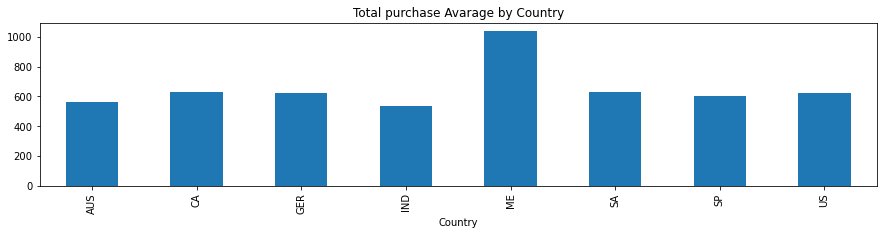

In [17]:
data.groupby(by='Country')['Total_Purchase'].mean().plot(kind='bar',figsize=(15,3),title='Total purchase Avarage by Country')

<AxesSubplot:title={'center':'Total purchase by Country'}, xlabel='Country'>

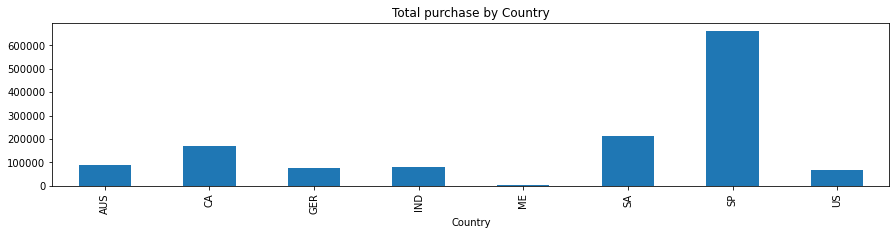

In [31]:
data.groupby(by='Country')['Total_Purchase'].sum().plot(kind='bar',figsize=(15,3),title='Total purchase by Country')

<AxesSubplot:title={'center':'clients Count by Country'}, xlabel='Country'>

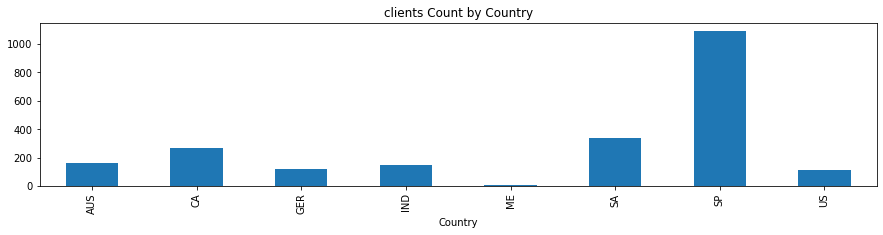

In [19]:
data.groupby(by='Country')['Total_Purchase'].count().plot(kind='bar',figsize=(15,3),title='clients Count by Country')

We can clearly see that the US is not our main source of revenue but SP and the buyer with the highest average actually comes from ME

Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test<br>
answer:

<AxesSubplot:title={'center':'NumStorePurchases'}, xlabel='Category'>

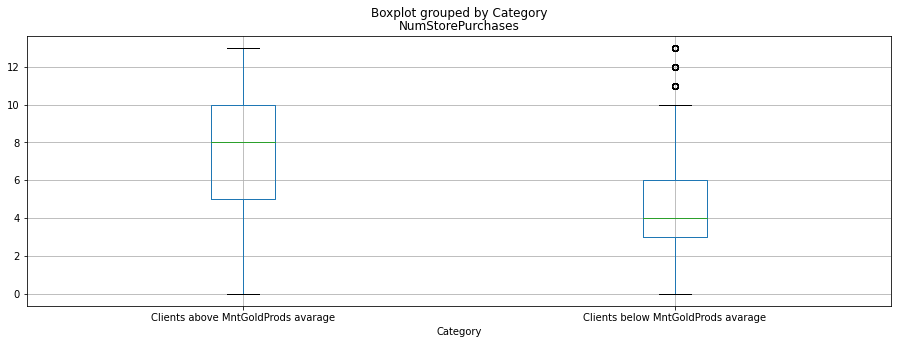

In [20]:
means= [['Clients above MntGoldProds avarage',data.where(data['MntGoldProds']>data['MntGoldProds'].mean())['NumStorePurchases'].mean()],
        ['Clients below MntGoldProds avarage',data.where(data['MntGoldProds']<data['MntGoldProds'].mean())['NumStorePurchases'].mean()],
       ['Total clients',data['NumStorePurchases'].mean()]]
data['Category']=np.where(data['MntGoldProds']>data['MntGoldProds'].mean(),'Clients above MntGoldProds avarage','Clients below MntGoldProds avarage')
data.boxplot(column=['NumStorePurchases'],by='Category',figsize=(15,5),ax=None)

We can see that pepole who bought more than the avg amount of gold are more likely buing at the store

<h3>Campain Analisis</h3>

AcceptedCmp1
0    2096
1     144
dtype: int64


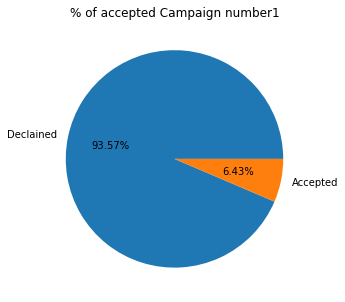

AcceptedCmp2
0    2210
1      30
dtype: int64


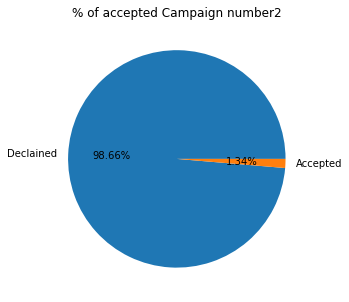

AcceptedCmp3
0    2077
1     163
dtype: int64


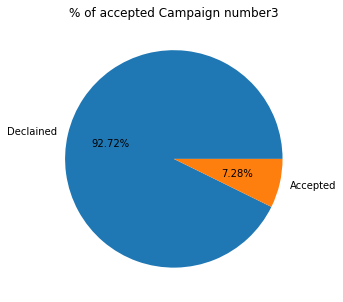

AcceptedCmp4
0    2073
1     167
dtype: int64


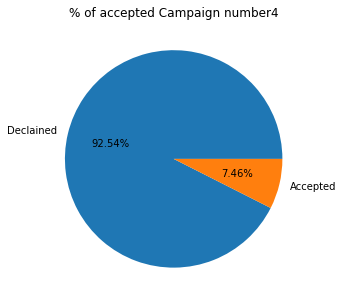

AcceptedCmp5
0    2077
1     163
dtype: int64


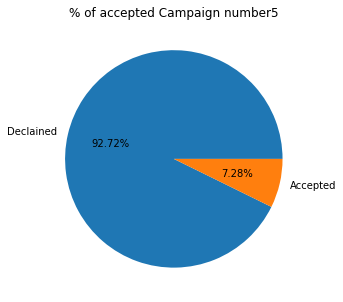

In [21]:
cols=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
for col in cols:
    print(data.value_counts(data[col]))
    plt.figure(figsize=(5,5))
    count=data.value_counts(data[col].tolist())
    plt.title('% of accepted Campaign number'+str(cols.index(col)+1))
    plt.pie(x=count,labels=['Declained','Accepted'],autopct='%.2f%%')
    plt.show()

Campaign in number 4 is the most successful one

Driling into the accepted Campaign by Marital_Status and does they have kids

In [33]:
grouped=data.groupby(by=['Marital_Status','Have_Kids']).agg(Total_amount=('Marital_Status','count'),Accepeted_Campaign1=('AcceptedCmp1','sum'))
grouped['Group_Accepeted_%']=round((grouped['Accepeted_Campaign1']/grouped['Total_amount'])*100,2)
grouped['Accepeted_%_relative_to all']=round((grouped['Accepeted_Campaign1']/data['Marital_Status'].count())*100,2)
grouped.sort_values(by='Group_Accepeted_%',ascending=False).reset_index()

,Marital_Status,Have_Kids,Total_amount,Accepeted_Campaign1,Group_Accepeted_%,Accepeted_%_relative_to all
0,Married,0,230,46,20.00,2.05
1,Widow,0,27,5,18.52,0.22
2,Single,0,169,27,15.98,1.21
3,Divorced,0,58,9,15.52,0.40
4,In a relationship,0,154,23,14.94,1.03
5,Married,1,634,17,2.68,0.76
6,In a relationship,1,426,9,2.11,0.40
7,Divorced,1,174,3,1.72,0.13
8,Single,1,318,5,1.57,0.22
9,Widow,1,50,0,0.00,0.00


<strong>Campaign1 drill down</strong>

In [34]:
grouped=data.groupby(by=['Marital_Status','Have_Kids']).agg(Total_amount=('Marital_Status','count'),Accepeted_Campaign2=('AcceptedCmp2','sum'))
grouped['Group_Accepeted_%']=round((grouped['Accepeted_Campaign2']/grouped['Total_amount'])*100,2)
grouped['Accepeted_%_relative_to all']=round((grouped['Accepeted_Campaign2']/data['Marital_Status'].count())*100,2)
grouped.sort_values(by='Group_Accepeted_%',ascending=False).reset_index()

,Marital_Status,Have_Kids,Total_amount,Accepeted_Campaign2,Group_Accepeted_%,Accepeted_%_relative_to all
0,Divorced,0,58,4,6.90,0.18
1,In a relationship,0,154,6,3.90,0.27
2,Widow,0,27,1,3.70,0.04
3,Single,0,169,4,2.37,0.18
4,In a relationship,1,426,6,1.41,0.27
5,Married,0,230,3,1.30,0.13
6,Married,1,634,4,0.63,0.18
7,Divorced,1,174,1,0.57,0.04
8,Single,1,318,1,0.31,0.04
9,Widow,1,50,0,0.00,0.00


<strong>Campaign2 drill down</strong>

In [35]:
grouped=data.groupby(by=['Marital_Status','Have_Kids']).agg(Total_amount=('Marital_Status','count'),Accepeted_Campaign3=('AcceptedCmp3','sum'))
grouped['Group_Accepeted_%']=round((grouped['Accepeted_Campaign3']/grouped['Total_amount'])*100,2)
grouped['Accepeted_%_relative_to all']=round((grouped['Accepeted_Campaign3']/data['Marital_Status'].count())*100,2)
grouped.sort_values(by='Group_Accepeted_%',ascending=False).reset_index()

,Marital_Status,Have_Kids,Total_amount,Accepeted_Campaign3,Group_Accepeted_%,Accepeted_%_relative_to all
0,Divorced,0,58,7,12.07,0.31
1,Single,1,318,26,8.18,1.16
2,Single,0,169,13,7.69,0.58
3,Divorced,1,174,13,7.47,0.58
4,Married,0,230,17,7.39,0.76
5,Married,1,634,46,7.26,2.05
6,In a relationship,0,154,10,6.49,0.45
7,In a relationship,1,426,27,6.34,1.21
8,Widow,1,50,3,6.00,0.13
9,Widow,0,27,1,3.70,0.04


<strong>Campaign3 drill down</strong>

In [36]:
grouped=data.groupby(by=['Marital_Status','Have_Kids']).agg(Total_amount=('Marital_Status','count'),Accepeted_Campaign4=('AcceptedCmp4','sum'))
grouped['Group_Accepeted_%']=round((grouped['Accepeted_Campaign4']/grouped['Total_amount'])*100,2)
grouped['Accepeted_%_relative_to all']=round((grouped['Accepeted_Campaign4']/data['Marital_Status'].count())*100,2)
grouped.sort_values(by='Group_Accepeted_%',ascending=False).reset_index()

,Marital_Status,Have_Kids,Total_amount,Accepeted_Campaign4,Group_Accepeted_%,Accepeted_%_relative_to all
0,Divorced,0,58,9,15.52,0.40
1,Widow,0,27,4,14.81,0.18
2,Widow,1,50,6,12.00,0.27
3,In a relationship,0,154,18,11.69,0.80
4,Single,0,169,19,11.24,0.85
5,Married,0,230,19,8.26,0.85
6,Married,1,634,44,6.94,1.96
7,In a relationship,1,426,25,5.87,1.12
8,Divorced,1,174,9,5.17,0.40
9,Single,1,318,14,4.40,0.62


<strong>Campaign4 drill down</strong>

In [32]:
grouped=data.groupby(by=['Marital_Status','Have_Kids']).agg(Total_amount=('Marital_Status','count'),Accepeted_Campaign5=('AcceptedCmp5','sum'))
grouped['Group_Accepeted_%']=round((grouped['Accepeted_Campaign5']/grouped['Total_amount'])*100,2)
grouped['Accepeted_%_relative_to all']=round((grouped['Accepeted_Campaign5']/data['Marital_Status'].count())*100,2)
grouped.sort_values(by='Group_Accepeted_%',ascending=False).reset_index()

,Marital_Status,Have_Kids,Total_amount,Accepeted_Campaign5,Group_Accepeted_%,Accepeted_%_relative_to all
0,In a relationship,0,154,37,24.03,1.65
1,Married,0,230,55,23.91,2.46
2,Widow,0,27,6,22.22,0.27
3,Single,0,169,30,17.75,1.34
4,Divorced,0,58,10,17.24,0.45
5,Widow,1,50,2,4.00,0.09
6,Married,1,634,11,1.74,0.49
7,Divorced,1,174,3,1.72,0.13
8,In a relationship,1,426,7,1.64,0.31
9,Single,1,318,2,0.63,0.09


<strong>Campaign5 drill down</strong>

The most important insight is that we need to improve our connection with the population that have kids its most of our custmers (71.5%) and have the lowest Group_Accepeted_%<br>
For that we need to look at Campaign number 3 with the best reasults for population with kids (5.13% relative_to all), learn what we did there and improve it

<h3>Summary</h3>

<strong>Correlation insights</strong><br>
1)We can see that pepole love to buy their wine at the store (0.64 corr)<br>
2)Pepole with kids at home prefer web shoping (-0.5 corr)<br>
<strong>Marital_Status insights</strong><br>
Most of our clients are Married (38.57%)<br>
<strong>Product insights</strong><br>
Our main income comes from wine(50.17%)<br>
<strong>Purchases by purchasing category insights</strong><br>
Most of our clients buy at the shop(38.95%)<br>
<strong>Country based insights</strong><br>
1)ME has the Highest purchasing avarage<br>
2)SP has the Highest purchases by country<br>
3)Most of our clients comes from SP<br>
<strong>Campaign based insights</strong><br>
1)Our best campaign is number 4 (7.46% accepted)<br>
2)We need to focus on clients with kids they are the majority of our clients(71.5%), we can learn from campaign number 3<br>
